In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('dataset3.csv')

In [4]:
print(df)

           Date  Ethylene Level  Temperature  Humidity Tomato Status  Season  \
0    2022-01-01             0.0           26        66      seedling  winter   
1    2022-01-02             0.0           25        67      seedling  winter   
2    2022-01-03             0.0           27        70       seeding  winter   
3    2022-01-04             0.0           28        70      seedling  winter   
4    2022-01-05             0.0           25        71      seedling  winter   
..          ...             ...          ...       ...           ...     ...   
360  2022-12-27             5.0           23        48     flowering  winter   
361  2022-12-28             7.0           21        49     flowering  winter   
362  2022-12-29             7.5           20        51     flowering  winter   
363  2022-12-30             7.9           19        49     flowering  winter   
364  2022-12-31             9.0           20        52     flowering  winter   

     Days to harvest  
0    81 - days t

In [3]:
# Convert the "Days to harvest" column to a string type
df['Days to harvest'] = df['Days to harvest'].astype(str)

# Remove the suffix from the "Days to harvest" column
df['Days to harvest'] = df['Days to harvest'].str.replace('- days to go', '')

# Convert the values in the "Days to harvest" column to floats
df['Days to harvest'] = pd.to_numeric(df['Days to harvest'], errors='coerce')

# Remove any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Tomato Status'] = label_encoder.fit_transform(df['Tomato Status'])
df['Season'] = label_encoder.fit_transform(df['Season'])

# Split the dataset into training and testing sets
X = df.drop(['Days to harvest', 'Date'], axis=1)
y = df['Days to harvest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
df

,Date,Ethylene Level,Temperature,Humidity,Tomato Status,Season,Days to harvest
0,2022-01-01,0.0,26,66,10,2,81
1,2022-01-02,0.0,25,67,10,2,80
2,2022-01-03,0.0,27,70,9,2,79
3,2022-01-04,0.0,28,70,10,2,78
4,2022-01-05,0.0,25,71,10,2,77
...,...,...,...,...,...,...,...
360,2022-12-27,5.0,23,48,1,2,38
361,2022-12-28,7.0,21,49,1,2,37
362,2022-12-29,7.5,20,51,1,2,36
363,2022-12-30,7.9,19,49,1,2,35


In [6]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
import joblib


# Save the model to a file
joblib.dump(rf_model, 'model.pkl')


['model.pkl']

In [8]:
# Load the saved model from a file
lq = joblib.load('model.pkl')


In [9]:
# Make predictions on the test data
y_pred = lq.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)


MSE: 16.544092115056067
R2: 0.9757723318375388


In [12]:
# Create a new input for prediction
new_input = np.array([[90, 40, 80, 2, 1]])

# Make a prediction on the new input
prediction = rf_model.predict(new_input)

print("Days to Harvest:", prediction[0])

Days to Harvest: 41.32


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('testdata.csv')

# Remove the suffix from the "Days to harvest" column
df['Days to harvest'] = df['Days to harvest'].str.replace('- days to go', '')

# Convert the values in the "Days to harvest" column to floats
df['Days to harvest'] = pd.to_numeric(df['Days to harvest'], errors='coerce')

# Encode categorical variables
label_encoder = LabelEncoder()
df['Tomato Status'] = label_encoder.fit_transform(df['Tomato Status'])
df['Season'] = label_encoder.fit_transform(df['Season'])

# Select the features for prediction
X = df.drop(['Days to harvest', 'Date'], axis=1)

# Make a prediction on the new input
prediction = rf_model.predict(X)

print("Days to Harvest:", prediction[0])


Days to Harvest: 39.98


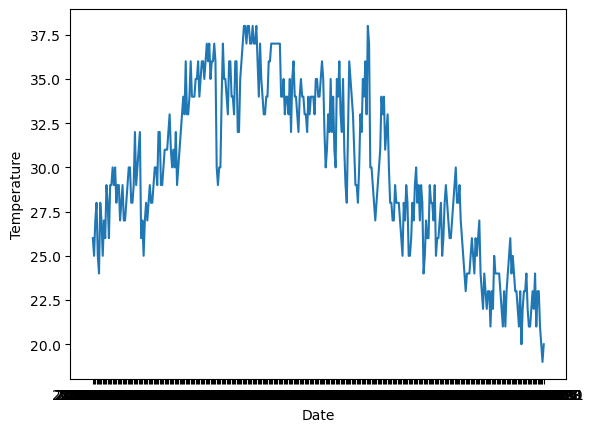

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

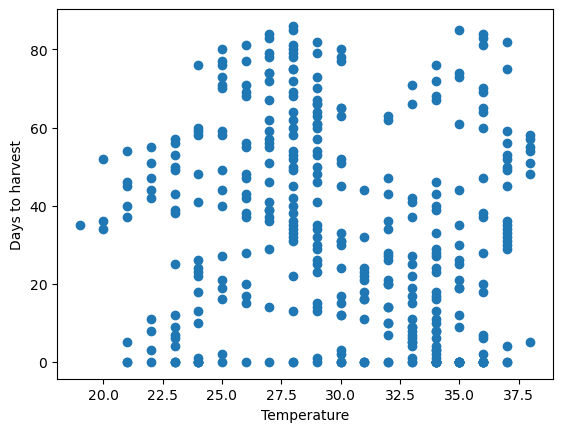

In [11]:
plt.scatter(df['Temperature'], df['Days to harvest'])
plt.xlabel('Temperature')
plt.ylabel('Days to harvest')
plt.show()

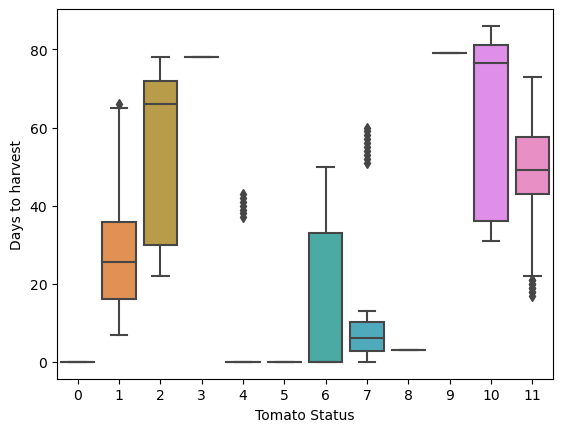

In [12]:
import seaborn as sns

sns.boxplot(x='Tomato Status', y='Days to harvest', data=df)
plt.show()


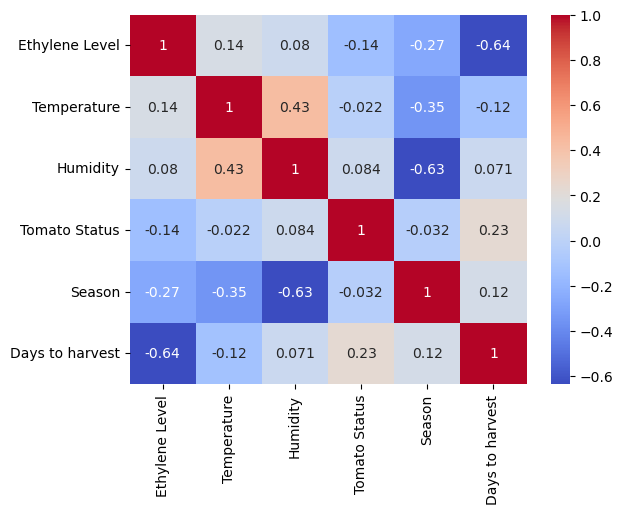

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

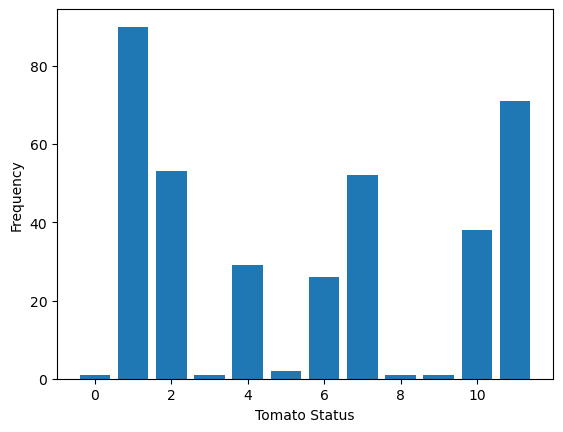

In [14]:
plt.bar(df['Tomato Status'].value_counts().index, df['Tomato Status'].value_counts().values)
plt.xlabel('Tomato Status')
plt.ylabel('Frequency')
plt.show()


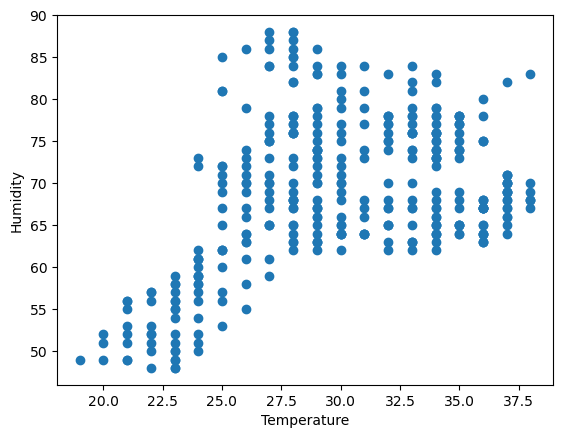

In [15]:
plt.scatter(df['Temperature'], df['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()
